In [ ]:
import torch
from tqdm import tqdm

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import euclidean_distances

In [ ]:
import warnings
warnings.filterwarnings('once')

In [ ]:
#@markdown $$\text{Stress}_s=\sqrt{\frac{\sum\bigl(f(||s_{ij}||)-d(X)\bigr)^2}{\sum d(X)^2}}$$


#@markdown $$f(||s_{ij}|| = a + b \cdot exp(s_{ij})$$

In [ ]:
class NMDS(torch.nn.Module):
    def __init__(self, amount, dim=2):
      super().__init__()
      self.X = torch.nn.Parameter(torch.rand(amount, dim))
      self.a = torch.nn.Parameter(torch.rand(1))
      self.b = torch.nn.Parameter(torch.rand(1))

    def forward(self, D) :
      pred_D = torch.cdist(self.X, self.X)
      D = torch.mul(D, self.b)
      D = torch.add(torch.exp(D), self.a)
      stress = torch.float_power(torch.sum(torch.float_power(D - pred_D, 2)) / torch.sum(pred_D), 1/2)
      return stress

In [ ]:
class NMDS_2(torch.nn.Module):
    def __init__(self, amount, dim=2):
      super().__init__()
      self.X = torch.nn.Parameter(torch.rand(amount, dim))
      self.a = torch.nn.Parameter(torch.rand(1))
      self.b = torch.nn.Parameter(torch.rand(1))

    def forward(self, D) :
      pred_D = torch.cdist(self.X, self.X)
      D = torch.mul(D, self.b)
      stress = torch.float_power(torch.sum(torch.float_power(D - pred_D, 2)) / torch.sum(pred_D), 1/2)
      return stress

In [ ]:
class NMDS_3(torch.nn.Module):
    def __init__(self, amount, dim=2):
      super().__init__()
      self.X = torch.nn.Parameter(torch.rand(amount, dim))
      self.a = 0
      self.b = torch.nn.Parameter(torch.rand(1))

    def forward(self, D) :
      pred_D = torch.cdist(self.X, self.X)
      D = torch.mul(D, self.b)
      stress = torch.float_power(torch.sum(torch.float_power(D - pred_D, 2)) / torch.sum(pred_D), 1/2)
      return stress

In [ ]:
tmp_D = np.array([[0, 1, 4, 5, 3, 4, 2, 8, 8, 5, 7, 1],
              [1, 0, 3, 8, 2, 6, 2, 7, 8, 8, 7, 2],
              [4, 3, 0, 7, 2, 3, 3, 7, 8, 6, 4, 3],
              [5, 8, 7, 0, 8, 9, 3, 8, 2, 2, 9, 5],
              [3, 2, 2, 8, 0, 6, 4, 8, 9, 6, 4, 2],
              [4, 6, 3, 9, 6, 0, 1, 3, 9, 8, 5, 3],
              [2, 2, 3, 3, 4, 1, 0, 4, 3, 6, 7, 1],
              [8, 7, 7, 8, 8, 3, 4, 0, 9, 6, 9, 5],
              [8, 8, 8, 2, 9, 9, 3, 9, 0, 4, 9, 9],
              [5, 8, 6, 2, 6, 8, 6, 6, 4, 0, 4, 3],
              [7, 7, 4, 9, 4, 5, 7, 9, 9, 4, 0, 6],
              [1, 2, 3, 5, 2, 3, 1, 5, 9, 3, 6, 0]])

names = ['пила',
        'дрель',
        'вентилятор',
        'цокот',
        'ветер',
        'гудок',
        'стадион',
        'колодец',
        'п. машинка',
        'гравий',
        'оса',
        'водопад']

In [ ]:
D = torch.from_numpy(tmp_D)

model = NMDS(len(D), 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

stress_values = []

for epoch in tqdm(range(100000), desc='Training Epochs'):
    optimizer.zero_grad()

    stress = model(D)
    stress_values.append(stress.item())
    stress.backward() # gradient

    optimizer.step() # better points

X_transform = model.X.detach().numpy()
stress = model(D)

#plt.plot(stress_values)
print('\n\nExp stress =', stress.item())

Training Epochs: 100%|██████████| 100000/100000 [00:42<00:00, 2338.13it/s]



Exp stress = 0.5218809989163905


In [ ]:
D = torch.from_numpy(tmp_D)

model = NMDS_2(len(D), 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

stress_values = []

for epoch in tqdm(range(10000), desc='Training Epochs'):
    optimizer.zero_grad()

    stress = model(D)
    stress_values.append(stress.item())
    stress.backward() # gradient

    optimizer.step() # better points

X_transform = model.X.detach().numpy()
stress = model(D)

#plt.plot(stress_values)
print('\n\nLinear stress =', stress.item())

Training Epochs: 100%|██████████| 10000/10000 [00:03<00:00, 2618.14it/s]



Linear stress = 0.2627407644105194


In [ ]:
D = torch.from_numpy(tmp_D)

model = NMDS_3(len(D), 2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)

stress_values = []

for epoch in tqdm(range(100000), desc='Training Epochs'):
    optimizer.zero_grad()

    stress = model(D)
    stress_values.append(stress.item())
    stress.backward() # gradient

    optimizer.step() # better points

X_transform = model.X.detach().numpy()
stress = model(D)

#plt.plot(stress_values)
print('\n\nLinear stress, a=0:', stress.item())

Training Epochs: 100%|██████████| 100000/100000 [00:38<00:00, 2630.51it/s]



Linear stress, a=0: 0.20528331359330299


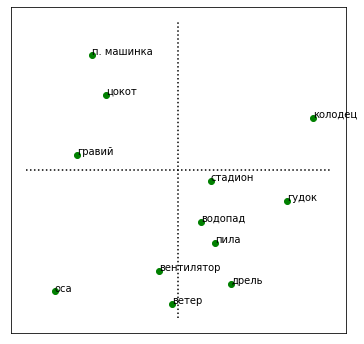

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
ax.scatter(X_transform[:,0], X_transform[:,1], color='green')


ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.plot([0.2, 1], [0.72, 0.72], ':', color='black')
plt.plot([0.6, 0.6], [0.3, 1.14], ':', color='black')

for i, txt in enumerate(names):
    ax.annotate(txt, X_transform[i])

plt.savefig("repr.png")

In [ ]:
mds = MDS(n_components=2, metric=False, random_state=0)
X_sklearn = mds.fit_transform(D)

print('\n\nSklearn stress =', mds.stress_)



Sklearn stress = 1.378456086872927


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_mds.py:518: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  "The MDS API has changed. ``fit`` now constructs an"


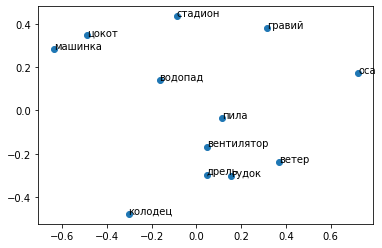

In [ ]:
fig, ax = plt.subplots()
ax.scatter(X_sklearn[:,0], X_sklearn[:,1])

for i, txt in enumerate(names):
    ax.annotate(txt, X_sklearn[i])